In [1]:
# import libraries 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
print(os.listdir("winequality"))

['winequality-names.txt', 'winequality-names.txt.bak', 'winequality-red.csv', 'winequality-white.csv']


In [3]:
# input white wine csv
whitewine = pd.read_csv("winequality/winequality-white.csv", sep=";")
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# out of the ones rated 6, what are the similarities 
# perceived bias, standard deviation 

In [4]:
whitewine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
# describe white wine data 
whitewine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
whitewine.groupby(["quality"]).count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,20,20,20,20,20,20,20,20,20,20,20
4,163,163,163,163,163,163,163,163,163,163,163
5,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457
6,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198
7,880,880,880,880,880,880,880,880,880,880,880
8,175,175,175,175,175,175,175,175,175,175,175
9,5,5,5,5,5,5,5,5,5,5,5


In [7]:
# look at white wine columns/data
whitewine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
whitewine["quality"] = whitewine["quality"].astype("float64")

In [9]:
# look at white wine columns/data
whitewine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null float64
dtypes: float64(12)
memory usage: 459.3 KB


In [10]:
# Labels are the values we want to predict - in this case quality
y = np.array(whitewine['quality'])

# Remove the quality column from the features - axis 1 refers to the columns
X = whitewine.drop('quality', axis = 1)

# Saving feature names for later use
X_list = list(X.columns)

# Convert to numpy array
X = np.array(X)

In [17]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 55, stratify=y)
s = pd.Series(y_test)
s.value_counts()

6.0    440
5.0    291
7.0    176
8.0     35
4.0     33
3.0      4
9.0      1
dtype: int64

In [12]:
X_test[0]

array([6.5000e+00, 2.3000e-01, 3.8000e-01, 1.3000e+00, 3.2000e-02,
       2.9000e+01, 1.1200e+02, 9.9298e-01, 3.2900e+00, 5.4000e-01,
       9.7000e+00])

In [41]:
# Feature Scaling (if you do a neural net you should do this)
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)


In [9]:
# Applying PCA - scaling tool 
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 3)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
# explained_variance = pca.explained_variance_ratio_



In [11]:
# The fraction of variance explained by a principal component is the ratio between the variance of that principal component and the total variance. 
# For several principal components, add up their variances and divide by the total variance.

print(explained_variance)

NameError: name 'explained_variance' is not defined

In [12]:
from sklearn.linear_model import LinearRegression
lr_c=LinearRegression()
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
score = lr_c.score(X, y)
print(f"R2 Score: {score}")


R2 Score: 0.2813619094058658


In [13]:
#Fitting Logistic regression into dataset
from sklearn.linear_model import LogisticRegression
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
print("The accuracy of  LogisticRegression is:",accuracy_score(y_test, lr_pred))

The accuracy of  LogisticRegression is: 0.4816326530612245


C:\Users\julia\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [14]:
import sklearn
print(sklearn.__version__)

0.22.1


Confusion matrix, without normalization
[[  0   0   1   3   0   0   0]
 [  0   0  11  22   0   0   0]
 [  0   0 106 184   1   0   0]
 [  0   0  74 366   0   0   0]
 [  0   0  10 166   0   0   0]
 [  0   0   1  34   0   0   0]
 [  0   0   0   1   0   0   0]]
Normalized confusion matrix
[[0.         0.         0.25       0.75       0.         0.
  0.        ]
 [0.         0.         0.33333333 0.66666667 0.         0.
  0.        ]
 [0.         0.         0.36426117 0.63230241 0.00343643 0.
  0.        ]
 [0.         0.         0.16818182 0.83181818 0.         0.
  0.        ]
 [0.         0.         0.05681818 0.94318182 0.         0.
  0.        ]
 [0.         0.         0.02857143 0.97142857 0.         0.
  0.        ]
 [0.         0.         0.         1.         0.         0.
  0.        ]]


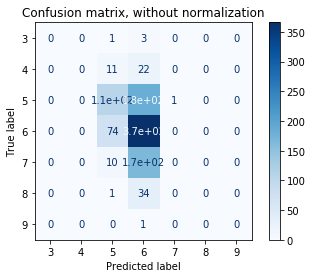

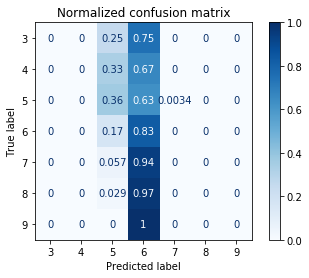

In [15]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(lr_c, X_test, y_test,
                                 display_labels=["3", "4", "5", "6", "7", "8", "9"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [16]:
print(lr_cm)

[[  0   0   1   3   0   0   0]
 [  0   0  11  22   0   0   0]
 [  0   0 106 184   1   0   0]
 [  0   0  74 366   0   0   0]
 [  0   0  10 166   0   0   0]
 [  0   0   1  34   0   0   0]
 [  0   0   0   1   0   0   0]]


In [17]:
#Fitting Decision Tree into dataset
from sklearn.tree import DecisionTreeClassifier


dtc=DecisionTreeClassifier(random_state=1)
dtc.fit(X_train,y_train)
dtc_pred=dtc.predict(X_test)
dtc_cm=confusion_matrix(y_test,dtc_pred)
print("The accuracy of DecisionTreeClassifier is:",accuracy_score(dtc_pred,y_test))

The accuracy of DecisionTreeClassifier is: 0.5826530612244898


In [39]:
from scipy.stats import uniform, truncnorm, randint
model_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': randint(4,200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.199)
}

In [18]:
#Fitting Randomforest into dataset
# from sklearn.ensemble import RandomForestClassifier
# # model_params = model.best_estimator_.get_params()
# # rf_model = RandomForestClassifier(model_params)

# # clf = RandomizedSearchCV(rf_model, model_params, n_iter=100, cv=5, random_state=1,verbose=2)
# rdf_c=RandomForestClassifier(**model_params)
# rdf_c=RandomForestClassifier(bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500, random_state=0, criterion='entropy')
# rdf_c=RandomForestClassifier(bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, random_state=0, criterion='entropy')
# {'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}
# model = rdf_c.fit(X_train,y_train)
# rdf_pred=rdf_c.predict(X_test)
# rdf_cm=confusion_matrix(y_test,rdf_pred)
# print("The accuracy of RandomForestClassifier is:",accuracy_score(rdf_pred,y_test))
# # from pprint import pprint
# pprint(model.best_estimator_.get_params())


NameError: name 'model_params' is not defined

In [19]:
#Fitting Randomforest into dataset
from sklearn.ensemble import RandomForestClassifier
rdf_c=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
print("The accuracy of RandomForestClassifier is:",accuracy_score(rdf_pred,y_test))

The accuracy of RandomForestClassifier is: 0.7071428571428572


In [27]:
import sklearn
sklearn.version()

AttributeError: module 'sklearn' has no attribute 'version'

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rdf_pred))

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         4
         4.0       0.83      0.30      0.44        33
         5.0       0.73      0.70      0.71       291
         6.0       0.67      0.81      0.73       440
         7.0       0.76      0.60      0.67       176
         8.0       1.00      0.51      0.68        35
         9.0       0.00      0.00      0.00         1

    accuracy                           0.71       980
   macro avg       0.57      0.42      0.46       980
weighted avg       0.72      0.71      0.70       980



C:\Users\julia\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
0.6826530612244898

In [21]:
print(rdf_cm)

[[  0   0   2   2   0   0   0]
 [  0  10  15   8   0   0   0]
 [  0   1 203  85   2   0   0]
 [  0   1  57 356  26   0   0]
 [  0   0   0  70 106   0   0]
 [  0   0   0  12   5  18   0]
 [  0   0   0   0   1   0   0]]


In [53]:
#Fitting KNN into dataset
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
knn_cm=confusion_matrix(y_test,knn_pred)
print("The accuracy of KNeighborsClassifier is:",accuracy_score(knn_pred,y_test))



The accuracy of KNeighborsClassifier is: 0.5580357142857143


In [18]:
print(knn_cm)

[[  0   1   0   3   0   0   0]
 [  2  11  25  21   3   0   0]
 [  6  22 255 173  22   6   0]
 [  2  30 153 406  67   7   0]
 [  1   5  55 111 117   3   0]
 [  0   2  12  18  21   7   0]
 [  0   0   0   1   0   0   0]]


In [54]:
#Fitting Naive bayes into dataset
from sklearn.naive_bayes import GaussianNB



gaussian=GaussianNB()
gaussian.fit(X_train,y_train)
bayes_pred=gaussian.predict(X_test)
bayes_cm=confusion_matrix(y_test,bayes_pred)
print("The accuracy of naives bayes is:",accuracy_score(bayes_pred,y_test))

The accuracy of naives bayes is: 0.44834183673469385


In [20]:
print(bayes_cm)

[[  0   1   1   2   0   0   0]
 [  0  11  15  36   0   0   0]
 [  1   8 137 338   0   0   0]
 [  1   4  96 564   0   0   0]
 [  1   0  30 261   0   0   0]
 [  1   0   2  57   0   0   0]
 [  0   0   0   1   0   0   0]]


In [55]:
#Fitting KNN into dataset
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
knn_cm=confusion_matrix(y_test,knn_pred)
print("The accuracy of KNeighborsClassifier is:",accuracy_score(knn_pred,y_test))

The accuracy of KNeighborsClassifier is: 0.5580357142857143


In [ ]:
# SGD

In [47]:
from xgboost import XGBClassifier

# Instantiate model with 1000 decision trees
rf = XGBClassifier(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train),

# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

xgb_cm=confusion_matrix(y_test,predictions)
print("The accuracy of xgboost is:",accuracy_score(predictions,y_test))

Mean Absolute Error: 0.37
The accuracy of xgboost is: 0.6612244897959184


In [62]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')

# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model, param_grid, verbose=3)

# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)

C:\Users\julia\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.535, total=   0.5s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.526, total=   0.5s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.536, total=   0.5s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.535, total=   0.4s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.526, total=   0.5s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.536, total=   0.5s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.535, total=   0.4s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.526, total=   0.5s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.536, total=   0.5s
[CV] C=5, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   28.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
#Fitting SVG into dataset

from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
X = [[0, 0], [1, 1], [1, 0], [0, 1]]
y = [0, 0, 1, 1]
rbf_feature = RBFSampler(gamma=1, random_state=1)
X_features = rbf_feature.fit_transform(X)
clf = SGDClassifier(max_iter=5)
clf.fit(X_features, y)
SGDClassifier(max_iter=5)
clf.score(X_features, y)

In [26]:
from sklearn.datasets import load_irisfrom sklearn.model_selection import cross_val_scoreclf = DecisionTreeClassifier(random_state=0)iris = load_iris()cross_val_score(clf, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [168]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

xgboost model - need to resave variables before running

In [18]:
# 
rdf_c.score(X_test, y_test)

0.7071428571428572

In [19]:
rdf_c.predict_proba(X_test)

array([[0.  , 0.  , 0.18, ..., 0.17, 0.05, 0.  ],
       [0.  , 0.  , 0.07, ..., 0.37, 0.13, 0.01],
       [0.  , 0.  , 0.06, ..., 0.89, 0.  , 0.  ],
       ...,
       [0.  , 0.16, 0.23, ..., 0.08, 0.  , 0.  ],
       [0.  , 0.02, 0.63, ..., 0.07, 0.  , 0.  ],
       [0.  , 0.  , 0.14, ..., 0.28, 0.07, 0.  ]])

In [21]:
list(zip(whitewine.columns, rdf_c.feature_importances_))
# list(zip(whitewine.columns, clf.feature_importances_))

[('fixed acidity', 0.07339815720663796),
 ('volatile acidity', 0.10002283493705355),
 ('citric acid', 0.0805855094856955),
 ('residual sugar', 0.08607654048009003),
 ('chlorides', 0.0838186987794677),
 ('free sulfur dioxide', 0.1006950914557018),
 ('total sulfur dioxide', 0.08756686110172739),
 ('density', 0.10147385974731785),
 ('pH', 0.08083319647565282),
 ('sulphates', 0.07546949065849583),
 ('alcohol', 0.13005975967215966)]

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 500, 1000],
    'random_state': [0],
    'criterion': ['entropy']
}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
print(grid_search)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [26]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:  8.6min finished


{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100,
 'random_state': 0}

Best params for gridsearch

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}
 
 
 
 {'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 500,
 'random_state': 0}

In [35]:
# from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
# iris = load_iris()

logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                              random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0,n_iter=4,verbose=2)
search = clf.fit(X_train, y_train)
search.best_params_
# {'C': 2..., 'penalty': 'l1'}

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=2.195254015709299, penalty=l1 .................................


C:\Users\julia\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. C=2.195254015709299, penalty=l1, total=   0.4s
[CV] C=2.195254015709299, penalty=l1 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .................. C=2.195254015709299, penalty=l1, total=   0.5s
[CV] C=2.195254015709299, penalty=l1 .................................
[CV] .................. C=2.195254015709299, penalty=l1, total=   0.5s
[CV] C=2.195254015709299, penalty=l1 .................................
[CV] .................. C=2.195254015709299, penalty=l1, total=   0.4s
[CV] C=2.195254015709299, penalty=l1 .................................
[CV] .................. C=2.195254015709299, penalty=l1, total=   0.4s
[CV] C=3.3770629943240693, penalty=l1 ................................
[CV] ................. C=3.3770629943240693, penalty=l1, total=   0.5s
[CV] C=3.3770629943240693, penalty=l1 ................................
[CV] ................. C=3.3770629943240693, penalty=l1, total=   0.4s
[CV] C=3.3770629943240693, penalty=l1 ................................
[CV] ................. C=3.3770629943240693, penalty=l1, total=   0.5s
[CV] C=3.3770629943240693, penalty=l1 ................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    8.2s finished


{'C': 2.195254015709299, 'penalty': 'l1'}

In [13]:
import pickle
filename = 'finalized_model_WHITE.sav'
pickle.dump(rdf_c, open(filename, 'wb'))

NameError: name 'rdf_c' is not defined

In [23]:
# load the model from disk
filename = 'finalized_model_WHITE.sav'
load_final_RED = pickle.load(open(filename, 'rb'))
result = load_final_RED.score(X_test, y_test)
print(result)

0.7071428571428572


In [22]:
one_pred = [8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1]
import pickle

In [24]:
# load the model from disk
filename = 'finalized_model_WHITE.sav'
load_final_RED = pickle.load(open(filename, 'rb'))
result = load_final_RED.predict_proba([one_pred])
print(result)

[[0.   0.   0.05 0.94 0.01 0.   0.  ]]
